In [1]:
import os, re
import pandas as pd
import geopandas as gpd
import dask.dataframe as dd
import contextily as ctx
import seaborn as sns
from tqdm import tqdm, trange
from mpl_toolkits import mplot3d

/srv/conda/envs/notebook/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
path = os.getcwd()
path = os.path.split(path)
path = os.path.join(path[0], 'Data', 'raw')

filepaths = []
for day in os.listdir(path):
    filepaths.extend([os.path.join(path, day)])

In [3]:
data = dd.read_parquet(filepaths[0])

In [4]:
df = data.partitions[0].compute()

In [5]:
df

,id,timestamp,latitude,longitude,geohash_12
0,09E223AE25614EFAFDB40D00216C8C8775FE69D8,1592078273,-34.909492,-56.198930,6cb13hvjqn9g
1,86E374DF44193BCCEEA234A59DE2C5A335331E68,1592057861,-34.851940,-55.996544,6cb1tz2s9zx4
2,B9BE7FFE9198BA2A32086ED23CB5DA967FCEA573,1592061077,-34.847683,-56.001040,6cb1v8jm90uf
3,C0893F93012B7DFC3632674C4A389357D0A131C6,1592054004,-34.782642,-55.928326,6cb4pk40rt94
4,E4F78660F73A5D1FED7E8F2ACE5E8265B6E5C70C,1592052213,-34.880928,-56.145763,6cb1d65gugtr
...,...,...,...,...,...
10308,83D36150DF86226D2B744EDF5FB964F6A64F3162,1592020612,-32.290947,-58.081340,6dq8q3d7wej3
10309,93F5D325CD76BA2BBF94C62DCADDAE5CF366970F,1592091057,-34.875440,-56.196266,6cb195p5u4g0
10310,1E7A96CCA45780F034CFD46C4753F736081A8B64,1592032511,-34.341297,-55.762210,6cbkeh75qmbw
10311,9A95DE036F50902C55B99B9763DE34FE70CA96D8,1592035348,-30.425850,-57.439680,6dx4uvjsw6wb


In [6]:
df.dtypes

id             object
timestamp       int64
latitude      float64
longitude     float64
geohash_12     object
dtype: object

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [8]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))

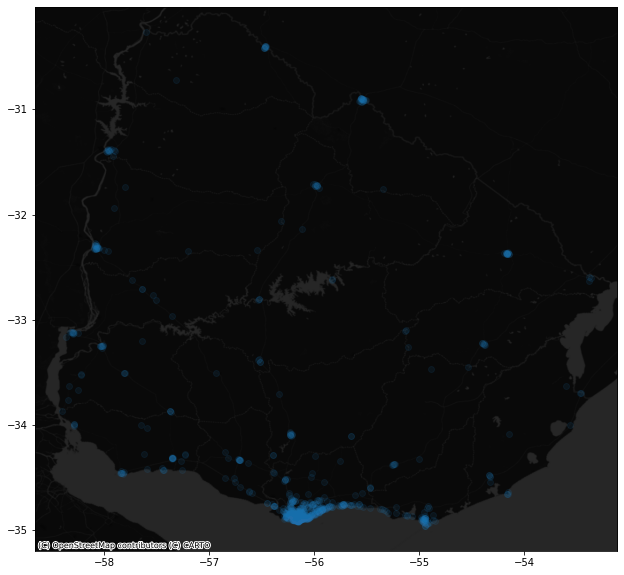

In [9]:
gdf.crs = "EPSG:4326"
plot = gdf.sample(1_000).plot(figsize=(15,10), alpha=0.1)
ctx.add_basemap(plot, source=ctx.providers.CartoDB.DarkMatterNoLabels, crs=gdf.crs)

In [10]:
df.sort_values('timestamp').set_index(['id', 'timestamp'])

,,latitude,longitude,geohash_12,geometry
id,timestamp,,,,
AE00FDD9BCCC33775F19B6A9AA9D2C1034379A82,2020-06-13 00:00:27,-32.603930,-53.385020,6f4n90whqg5b,POINT (-53.38502 -32.60393)
2CA4AE1D4A183277FEDEDCC9CB517F2D84C1C2AF,2020-06-13 00:00:29,-34.880013,-56.196010,6cb194r34n4f,POINT (-56.19601 -34.88001)
1268DE407F9360F90505401ED9F0F38BAF728997,2020-06-13 00:00:32,-34.901978,-54.971188,6cbcmn71nxbt,POINT (-54.97119 -34.90198)
750E16C1A616FE32C1D07CD4BB369C70B63852DF,2020-06-13 00:00:38,-34.899475,-56.184685,6cb13qxxcfjs,POINT (-56.18469 -34.89948)
2A160B2185D62932C57249D7B967DA7C9B4589E5,2020-06-13 00:00:44,-34.902600,-54.931713,6cbcmypvwk48,POINT (-54.93171 -34.90260)
...,...,...,...,...,...
33F7FE9A0E0272849F87DA097BC0407078B77549,2020-06-13 23:59:32,-34.514110,-56.761460,69zeskgsdp7f,POINT (-56.76146 -34.51411)
EC13963D90882FF0F1C4103DE7BD6463794D0A30,2020-06-13 23:59:32,-34.755966,-56.220013,6cb428vgff3r,POINT (-56.22001 -34.75597)
0E3C27A18680617ED9532AA30DAF26AE31796B51,2020-06-13 23:59:40,-34.518345,-56.280365,69zgxk1uh3zm,POINT (-56.28037 -34.51834)


In [11]:
full_df = data.compute()

In [12]:
full_df

,id,timestamp,latitude,longitude,geohash_12
0,09E223AE25614EFAFDB40D00216C8C8775FE69D8,1592078273,-34.909492,-56.198930,6cb13hvjqn9g
1,86E374DF44193BCCEEA234A59DE2C5A335331E68,1592057861,-34.851940,-55.996544,6cb1tz2s9zx4
2,B9BE7FFE9198BA2A32086ED23CB5DA967FCEA573,1592061077,-34.847683,-56.001040,6cb1v8jm90uf
3,C0893F93012B7DFC3632674C4A389357D0A131C6,1592054004,-34.782642,-55.928326,6cb4pk40rt94
4,E4F78660F73A5D1FED7E8F2ACE5E8265B6E5C70C,1592052213,-34.880928,-56.145763,6cb1d65gugtr
...,...,...,...,...,...
10369,EF7BBCB416E99CBEE2FDA035C8A975E54958C0A8,1592037817,-33.872013,-57.361713,69zpq9y3pnyd
10370,E2BD91AB6BF991B2B029ACAE541BBA87450BBD70,1592014362,-32.810810,-56.532455,6dpv3dfr4me1
10371,CCFA0557CF91430886B74530FE7B770C7F6FA610,1592078557,-34.912918,-56.159077,6cb16h61w8ec
10372,26170E2201754F1D0FEB6B7ED9F307D7CCD6E312,1592078857,-34.886288,-56.088276,6cb1e9ju8kyb


In [13]:
full_df['timestamp'] = pd.to_datetime(full_df['timestamp'], unit='s')
full_df = gpd.GeoDataFrame(full_df, geometry=gpd.points_from_xy(full_df['longitude'], full_df['latitude']))

In [14]:
full_df = full_df.sort_values('timestamp').set_index(['id', 'timestamp'])

In [15]:
full_df = full_df.reset_index()

In [16]:
ctx.providers.Thunderforest.MobileAtlas['apikey'] = 'bb3f176c8d1e46d09ed2d47a2bf5996c'

In [17]:
full_df.crs = "EPSG:4326"

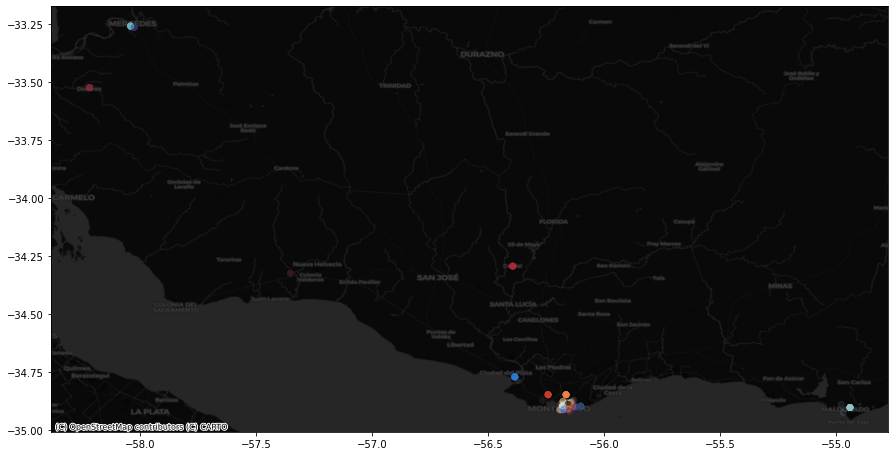

In [18]:
plot = full_df.loc[full_df['id'].isin(full_df['id'].value_counts().index[:20])
                  ].sample(1_000)\
                   .plot(figsize=(15,10), alpha=0.1, column='id', cmap='icefire')
ctx.add_basemap(plot, source=ctx.providers.CartoDB.DarkMatter, crs=full_df.crs)

In [19]:
df = df.sample(1000)

In [20]:
a = df['timestamp'].iloc[0]
a.hour * 3600 + a.minute * 60 + a.second

81351

In [21]:
a

Timestamp('2020-06-13 22:35:51')

In [22]:
df['delta'] = df['timestamp'] - pd.to_datetime('2020-06-13')

In [23]:
df['delta'] = df['delta'].apply(lambda x: x.total_seconds())

In [24]:
import matplotlib.pyplot as plt

In [25]:
df = df.sample(600)

In [51]:
mapper = df['id'].value_counts().reset_index().drop(columns=['id']).reset_index().to_dict('dict').get('index')

In [57]:
mapper = {v:k for k,v in mapper.items()}

In [59]:
df['id'] = df['id'].map(mapper)

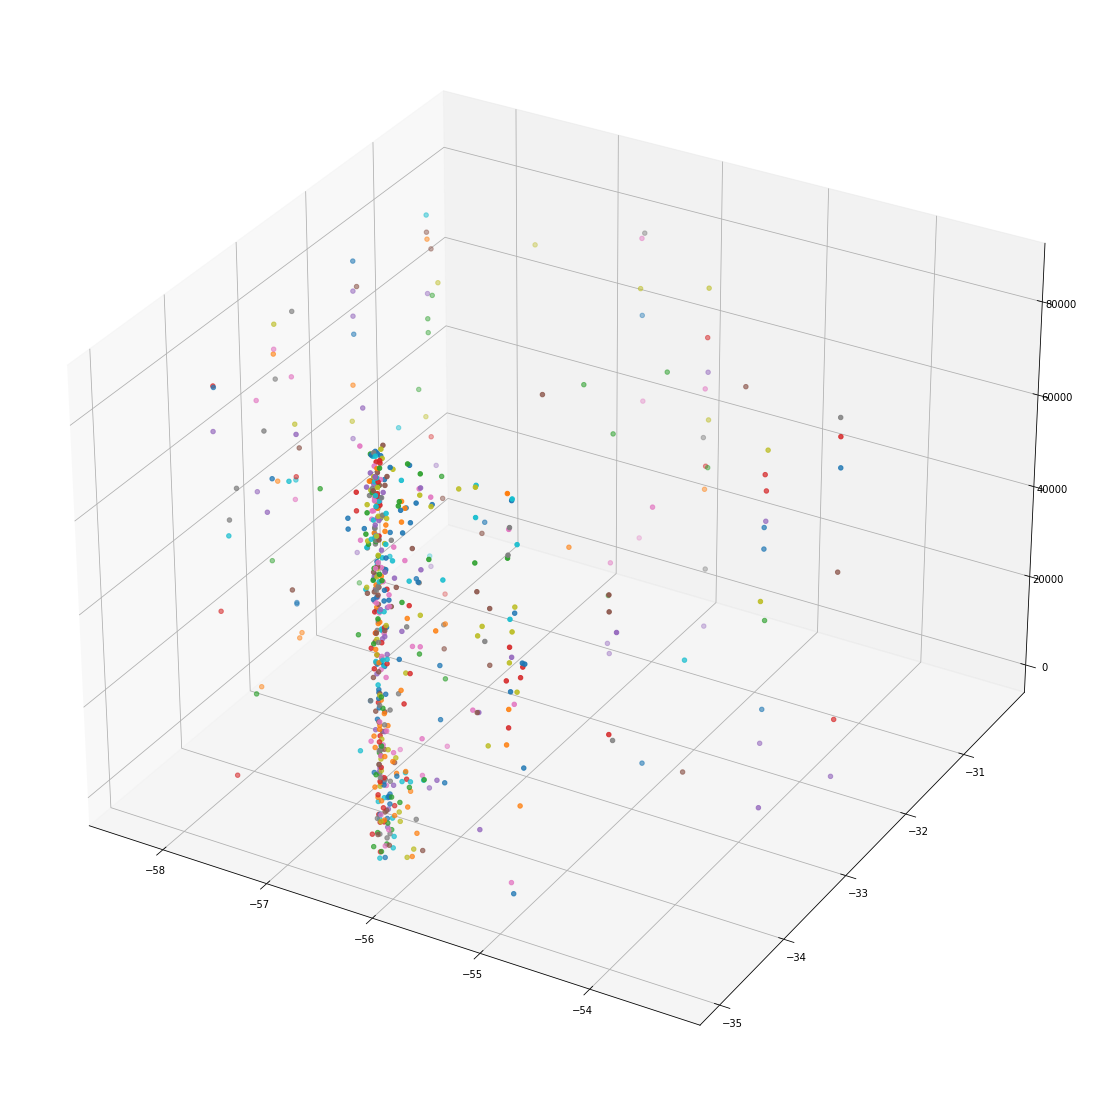

In [61]:
plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = df['delta']
xline = df['longitude']
yline = df['latitude']
ax.scatter3D(xline, yline, zline, c=df['id'], cmap='tab10')

In [ ]:
import giddy